In [ ]:
from plotly import graph_objects as go
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Fonctions utiles

In [ ]:

def lire_ligne_nn_vide(f):
    ligne = f.readline().strip()
    while ligne == "" and not f.tell() == f.seek(0, 2):  # eof check
        ligne = f.readline().strip()
    return ligne


def read_instance(filepath):
    with open(filepath, 'r') as f:
        # read the first line
        nombres_aerodromes = int(f.readline())
        # print(nombres_aerodromes)
        depart = int(f.readline())
        # print(depart)
        arrivee = int(f.readline())
        # print(arrivee)
        nombre_min_aerodromes = int(f.readline())
        # print(nombre_min_aerodromes)
        nombre_regions = int(f.readline())
        # print(nombre_regions)
        f.readline()
        regions_aerodromes = f.readline().split()
        regions_aerodromes = [int(region) for region in regions_aerodromes]
        f.readline()
        rayon_max = int(f.readline())
        f.readline()
        coordonnes = [f.readline().split() for _ in range(nombres_aerodromes)]
        coordonnes = np.array(coordonnes, dtype=float)
    return nombres_aerodromes, depart, arrivee, nombre_min_aerodromes, nombre_regions, regions_aerodromes, rayon_max, coordonnes

In [ ]:
def graph(paths, coordonnes, regions_aerodromes, depart, arrivee):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=coordonnes[:, 0], y=coordonnes[:, 1], mode='markers', marker=dict(
        color=regions_aerodromes,
        colorscale='Viridis',
        size=10
        )))

    fig.add_trace(go.Scatter(x=[coordonnes[depart-1][0]], y=[coordonnes[depart-1][1]], mode='text', text=['Departure'],
                             textposition='top center', textfont=dict(size=12, color='black')))

    fig.add_trace(go.Scatter(x=[coordonnes[arrivee-1][0]], y=[coordonnes[arrivee-1][1]], mode='text', text=['Arrival'],
                             textposition='top center', textfont=dict(size=12, color='black')))

    for i in range(len(coordonnes)):
        fig.add_trace(go.Scatter(x=[coordonnes[i][0]], y=[coordonnes[i][1]], mode='text', text=[str(i+1)],
                                 textposition='top center', textfont=dict(size=12, color='black')))

    for i in range(len(paths)):
        for j in range(len(paths[i])):
            if paths[i][j] == 1:
                fig.add_trace(go.Scatter(x=[coordonnes[i, 0], coordonnes[j, 0]], y=[
                    coordonnes[i, 1], coordonnes[j, 1]], mode='lines', line=dict(color='black')))

    fig.update_layout(width=800, height=800)

    fig.show()

In [143]:
def plot_solution_graph(nombre_aerodromes, depart, arrivee, coordonnees, regions, X, instance = None):
    """
    Plot the solution of the shortest path problem as a directed graph with nodes colored by region.
    
    Parameters:
    - nombre_aerodromes: Total number of nodes (aerodromes).
    - depart: Starting node.
    - arrivee: Ending node.
    - coordonnees: List of (x, y) coordinates for each aerodrome.
    - regions: List assigning each aerodrome to a region.
    - X: Solution matrix where X[i, j] = 1 indicates an arc from node i to node j.
    """
    # Create directed graph
    G = nx.DiGraph()

    # Add nodes with positions from coordinates
    positions = {i: (coordonnees[i][0], coordonnees[i][1])
                 for i in range(nombre_aerodromes)}
    G.add_nodes_from(positions.keys())

    # Add directed edges based on X matrix
    for i in range(nombre_aerodromes):
        for j in range(nombre_aerodromes):
            if X[i, j] > 0.5:  # Add edge if arc exists
                G.add_edge(i, j)

    # Assign colors to each region
    unique_regions = list(set(regions))
    # Generate distinct colors for each region
    color_map = plt.cm.get_cmap("tab10", len(unique_regions))
    region_colors = {region: color_map(i)
                     for i, region in enumerate(unique_regions)}
    node_colors = [region_colors[regions[i]] for i in range(nombre_aerodromes)]

    # Plotting
    plt.figure(figsize=(15, 15))
    nx.draw_networkx_nodes(G, pos=positions, node_size=300,
                           node_color=node_colors, edgecolors='black')
    nx.draw_networkx_edges(G, pos=positions, arrowstyle='->',
                           arrowsize=20, edge_color='blue', width=1.2)
    nx.draw_networkx_labels(G, pos=positions, labels={
                            i: i+1 for i in range(nombre_aerodromes)}, font_size=10)

    # # Highlight the starting and ending nodes with same colors as their regions but with larger size
    nx.draw_networkx_nodes(G, pos=positions, nodelist=[
                           depart-1], node_size=800, node_color = region_colors[regions[depart-1]], label='Start', edgecolors='black')
    nx.draw_networkx_nodes(G, pos=positions, nodelist=[
                           arrivee-1], node_size=800, node_color=region_colors[regions[arrivee-1]], label='End', edgecolors='black')

    # Title and legend
    if instance is not None:
        # " title en gras "
        plt.title(f"Shortest Path Solution for {instance}", font = {'weight' : 'bold'})
    else :
        plt.title("Shortest Path Solution (Directed Graph by Region)")

    # if instance == 'instance_100_1':
    #     # limit plot xaxis : [162 - 180] and yaxis : [0 - 20]
    #     plt.xlim(162, 180)
    #     plt.ylim(0, 20)    
    # Create a legend for the regions
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f"Region {region}",
                                  markerfacecolor=color, markersize=10) for region, color in region_colors.items()]
    plt.legend(handles=legend_elements, title="Regions", title_fontsize='large', fontsize='large',
                loc='center left', bbox_to_anchor=(1, 0.5))
    plt.axis("off")
    plt.savefig(f"plots/Shortest Path Solution for {instance}.png")
    plt.show()

## Code pour plot le chemin pour une instance et une formulation donneés

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


nombre_aerodromes = 30
aerodrome depart = 19
aerodrome arrivee = 10
nombre_min_aerodromes = 14
nombre_regions = 3
regions de chaque aerodrome = [1, 2, 3, 3, 1, 3, 3, 0, 2, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 3, 1, 2]
rayon max = 18


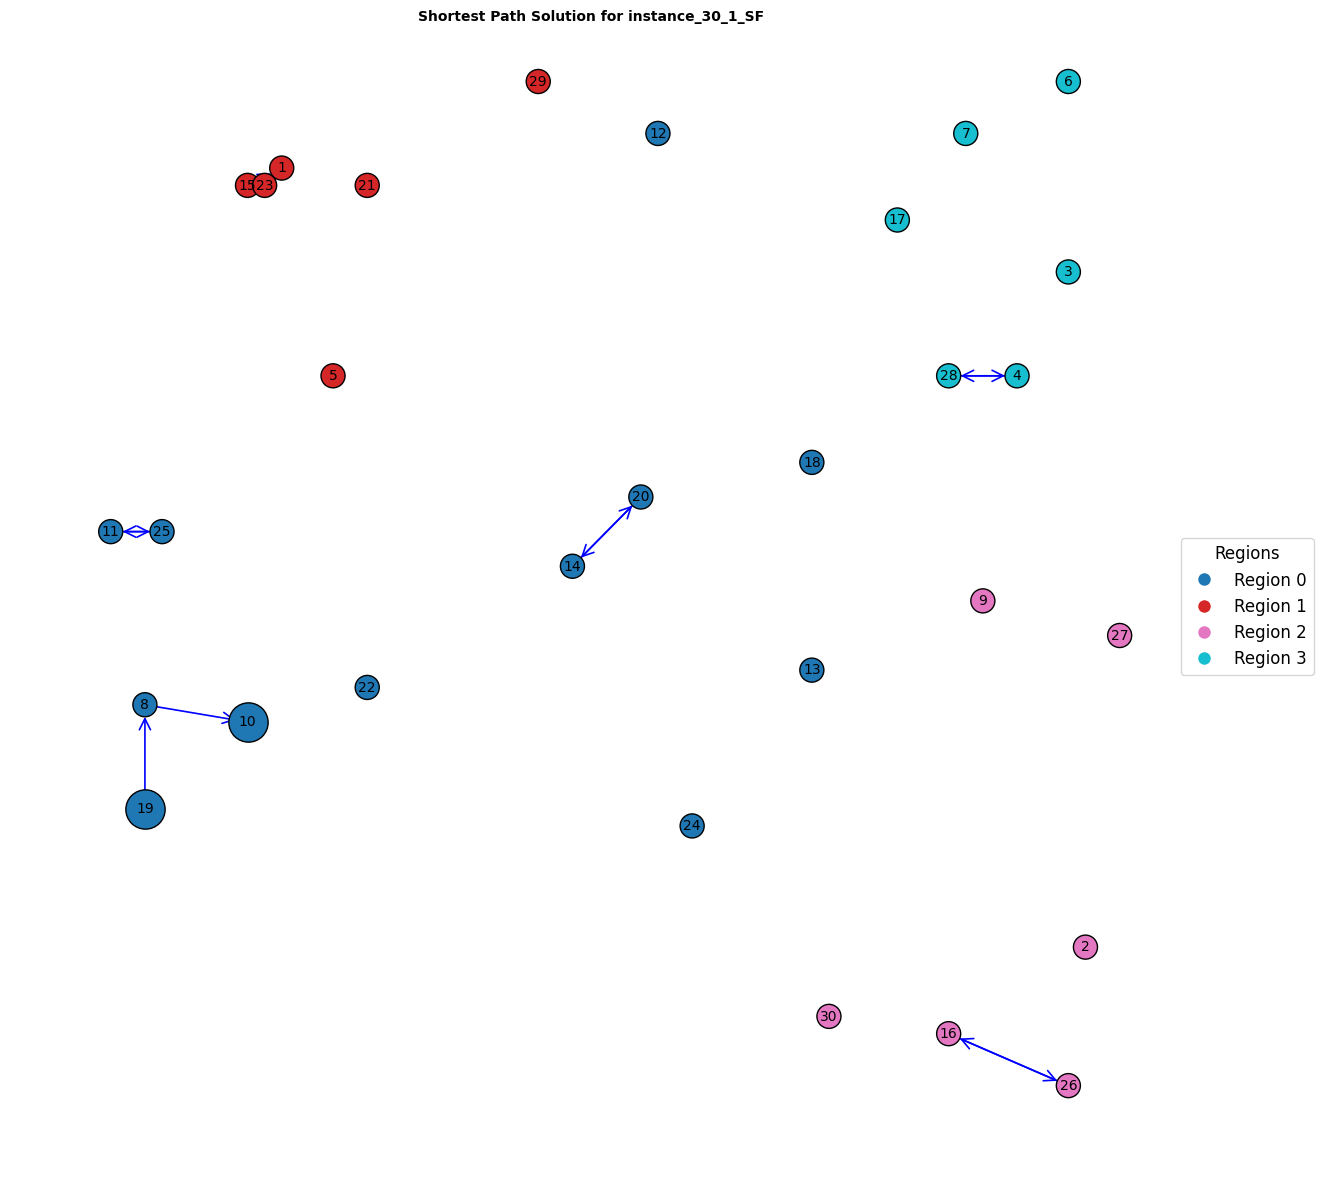

In [144]:
methode = 'SF'
instance = f"instance_30_1"

instance_path = f"Instances/{instance}.txt"
nombres_aerodromes, depart, arrivee, nombre_min_aerodromes, nombre_regions, regions_aerodromes, rayon_max, coordonnes = read_instance(instance_path)
print("nombre_aerodromes =", nombres_aerodromes)
print("aerodrome depart =", depart)
print("aerodrome arrivee =", arrivee)
print("nombre_min_aerodromes =", nombre_min_aerodromes)
print("nombre_regions =", nombre_regions)
print("regions de chaque aerodrome =", regions_aerodromes)
print("rayon max =", rayon_max)

solution_path = f"Instances\Solutions\solution_{instance}_{methode}.txt"
with open(solution_path, 'r') as f:
    paths = f.readline()
    
paths = paths.split(';')
paths = [path.split() for path in paths]
paths = np.array(paths, dtype=float)
paths = np.abs(paths)


# graph(paths, coordonnes, regions_aerodromes, depart, arrivee)
plot_solution_graph(nombres_aerodromes, depart, arrivee,
                    coordonnes, regions_aerodromes, paths, instance=instance + f"_{methode}")

## Boucle pour enregistrer les figures des chemins de toutes les instances

In [ ]:
methode = 'DFJ'
instance = f"instance_50_1"
for instance in ['instance_6_1', 'instance_20_1', 'instance_20_2', 'instance_20_3', 'instance_30_1', 'instance_40_1', 'instance_50_1', 'instance_70_1', 'instance_80_1', 'instance_80_2', 'instance_100_1']:
    instance_path = f"Instances/{instance}.txt"
    nombres_aerodromes, depart, arrivee, nombre_min_aerodromes, nombre_regions, regions_aerodromes, rayon_max, coordonnes = read_instance(
        instance_path)
    print("nombre_aerodromes =", nombres_aerodromes)
    print("aerodrome depart =", depart)
    print("aerodrome arrivee =", arrivee)
    print("nombre_min_aerodromes =", nombre_min_aerodromes)
    print("nombre_regions =", nombre_regions)
    print("regions de chaque aerodrome =", regions_aerodromes)
    print("rayon max =", rayon_max)

    solution_path = f"Instances\Solutions\solution_{instance}_{methode}.txt"
    with open(solution_path, 'r') as f:
        paths = f.readline()

    paths = paths.split(';')
    paths = [path.split() for path in paths]
    paths = np.array(paths, dtype=float)
    paths = np.abs(paths)


    # graph(paths)
    plot_solution_graph(nombres_aerodromes, depart, arrivee,
                        coordonnes, regions_aerodromes, paths, instance=instance)

In [6]:
# problème hacker rank 
N = 0
E = 1
S = 2
W = 3
def isCircular(path):
 
    # Initialize starting point for robot as (0, 0) and starting
    # direction as N North
    x = 0
    y = 0
    dir = N
 
    # Traverse the path given for robot
    for i in range(len(path)):
 
        # Find current move
        move = path[i]
 
        # If move is left or right, then change direction
        if move == 'R':
            dir = (dir + 1)%4
        elif move == 'L':
            dir = (4 + dir - 1)%4
 
        # If move is Go, then change x or y according to
        # current direction
        else:    # if move == 'G'
            if dir == N:
                y += 1
            elif dir == E:
                x += 1
            elif dir == S:
                y -= 1
            else:
                x -= 1
 
    return (x == 0 and y == 0)